# Phoneme Imbalanced Dataset Classification

### Imbalanced Data

In Imbalanced data, the distributions of observations across known classes(labels) are skewed or biased. we have large amount of data for one class (majority class) and less amount of data for one or more other classes (minority class). 

### Challenges

The model will result in high accuracy but the model performs poorly on predicting the minority class. 

In [1]:
# importing the dataset
import pandas as pd
df = pd.read_csv('phoneme.csv',header=None)

In [2]:
# print top 5 rows
df.head(n=5)

,0,1,2,3,4,5
0,1.240,0.875,-0.205,-0.078,0.067,0
1,0.268,1.352,1.035,-0.332,0.217,0
2,1.567,0.867,1.300,1.041,0.559,0
3,0.279,0.990,2.555,-0.738,0.000,0
4,0.307,1.272,2.656,-0.946,-0.467,0


The goal of the dataset was to distinguish between nasal and oral vowels. Vowel sounds were spoken and recorded to digital files. The audio features were automatically extracted from each sound. Five attributes were chosen to characterize each vowel. They are the amplitudes of the first five harmonics AHi, normalized by the total energy Ene AHi/Ene. 
 
 # Nasal Vowels(0)
 
 Nasal Vowels are produced when air passes through the nose as well as the mouth. 
 
 # Oral Vowels(1)
 
 Oral Vowels are produced mainly within the oral cavity.

In [4]:
# dimensions of the dataset
df.shape

(5404, 6)

In [15]:
# summarize the class distribution
from collections import Counter
counter = Counter(df[5])
for label, count in counter.items():
    percent = count / 5404 * 100
    print("class = %d, count = %d, percentage = %.3f" %(label,count,percent))

class = 0, count = 3818, percentage = 70.651
class = 1, count = 1586, percentage = 29.349


The dataset contains 70.6% of datapoints from class 0(majority class) and 29.4% of datapoints from class 1(minority class) which leads to imblancing state.

In [26]:
# summary of the data
df.describe()

,0,1,2,3,4,5
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.818957,1.258802,0.764732,0.398743,0.078619,0.293486
std,0.858733,0.851057,0.925436,0.796531,0.575624,0.455401
min,-1.700000,-1.327000,-1.823000,-1.581000,-1.284000,0.000000
25%,0.243750,0.596000,-0.115000,-0.205000,-0.232250,0.000000
50%,0.492500,1.075500,0.729000,0.285500,-0.044000,0.000000
75%,1.089250,1.866250,1.484000,0.937000,0.196250,1.000000
max,4.107000,4.378000,3.199000,2.826000,2.719000,1.000000


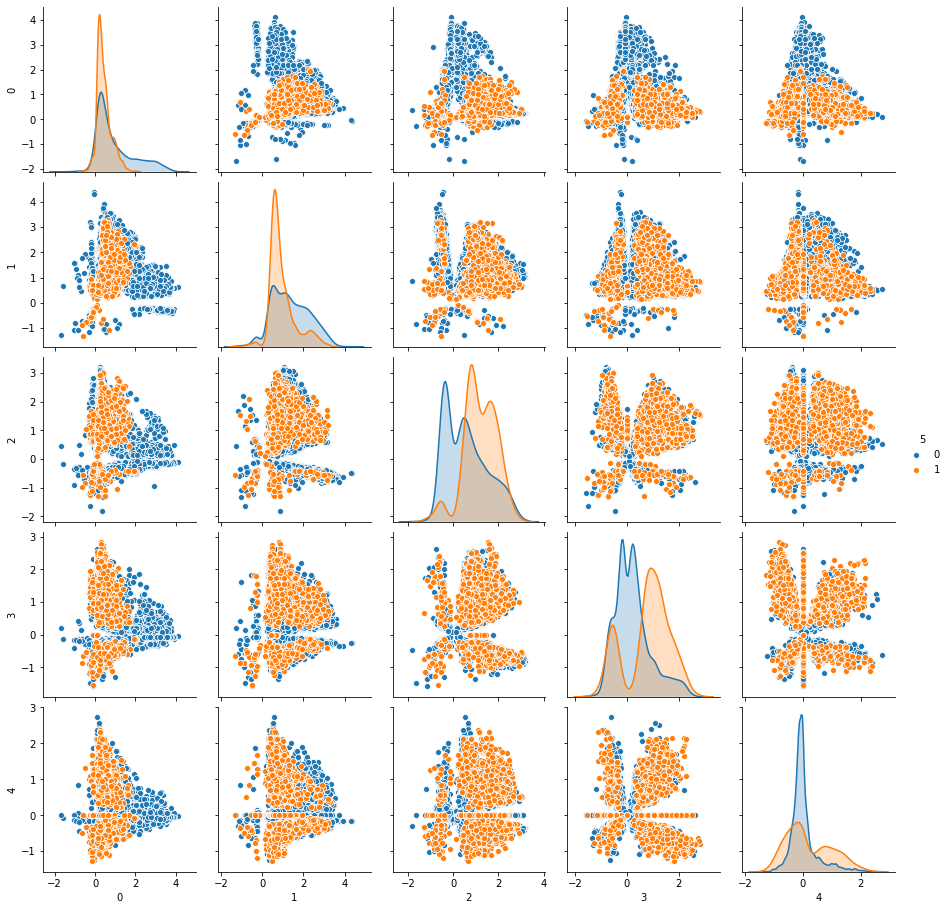

In [16]:
#pairwise scatterplot for all variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df, hue = 5)
plt.show()

# Base Model and result

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
y = df[5].values
X = df.drop([5],axis=1)
# evaluate a model using Repeated Stratified K-Fold CV
def evaluate_model(X,y,model):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 111)
    scores = cross_val_score(model,X,y,scoring='f1',cv=cv,n_jobs=1)
    return scores

In [29]:
# define model to test
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
def get_models():
    models, names = [], []
    # LR
    models.append(LogisticRegression())
    names.append('LR')
    #SVM
    models.append(SVC())
    names.append('svm')
    #ExtraTrees Classifier
    models.append(ExtraTreesClassifier())
    names.append('ETC')
    #Decision Tree Classifier
    models.append(DecisionTreeClassifier())
    names.append('DTC')
    #KNN
    models.append(KNeighborsClassifier())
    names.append('KNN')
    return models, names

In [34]:
from numpy import mean
# define models
models, names = get_models()
results = []
# evaluate each model
for i in range(len(models)):
	# evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# summarize and store
	print('>%s %.3f' % (names[i], mean(scores)))


>LR 0.522
>svm 0.728
>ETC 0.857
>DTC 0.785
>KNN 0.798


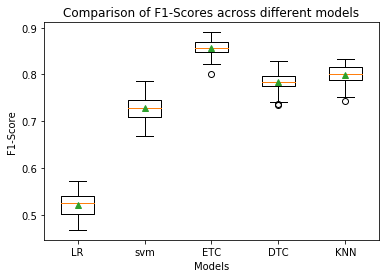

In [36]:
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Comparison of F1-Scores across different models')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.show()

The result suggested that Extra Trees Classifier(ETC) has performed well with the Avg F1-Score of 0.857. So it is selected as the final model

# Data Oversampling Techniques

Five different Oversampling Techniques:

1.Random Oversampling

2.SMOTE

3.Borderline SMOTE

4.SVM SMOTE

5.ADASYN

In [38]:
# define oversample methods to test
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
def oversampling_methods():
	models, names = list(), list()
	# RandomOverSampler
	models.append(RandomOverSampler())
	names.append('ROS')
	# SMOTE
	models.append(SMOTE())
	names.append('SMOTE')
	# BorderlineSMOTE
	models.append(BorderlineSMOTE())
	names.append('BLSMOTE')
	# SVMSMOTE
	models.append(SVMSMOTE())
	names.append('SVMSMOTE')
	# ADASYN
	models.append(ADASYN())
	names.append('ADASYN')
	return models, names

In [39]:
# define models
models, names = oversampling_methods()
results = list()
# evaluate each model
for i in range(len(models)):
	# define the model
	model = ExtraTreesClassifier(n_estimators=1000)
	# define the pipeline steps
	steps = [('s', MinMaxScaler()), ('o', models[i]), ('m', model)]
	# define the pipeline
	pipeline = Pipeline(steps=steps)
	# evaluate the model and store results
	scores = evaluate_model(X, y, pipeline)
	results.append(scores)
	# summarize and store
	print('>%s %.3f' % (names[i], mean(scores)))

>ROS 0.859
>SMOTE 0.861
>BLSMOTE 0.860
>SVMSMOTE 0.859
>ADASYN 0.860


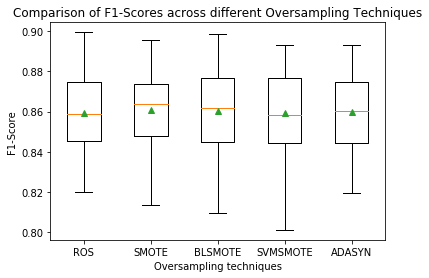

In [40]:
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Comparison of F1-Scores across different Oversampling Techniques')
plt.xlabel('Oversampling techniques')
plt.ylabel('F1-Score')
plt.show()

This result suggested that the SMOTE along with ExtraTrees Classifier have performed well since it has slightly higher avg F1-score than normal ExtraTrees Classifier